In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

In [2]:
# Color Axis limits
vmin = -2000
vmax = 2000

# Color definitions
ClrS = (0.74, 0.00, 0.00)
ClrN = (0.20, 0.56, 1.00)

Clr = [(0.00, 0.00, 0.00),
      (0.31, 0.24, 0.00),
      (0.43, 0.16, 0.49),
      (0.32, 0.70, 0.30),
      (0.45, 0.70, 0.90),
      (1.00, 0.82, 0.67)]

# # Colormap Definition
# current_cmap = plt.cm.get_cmap('hmimag').copy()
# current_cmap.set_bad(color='black')

# grad_cmap = plt.cm.get_cmap('seismic').copy()
# grad_cmap.set_bad(color='black')

# grad_cmap_abs = plt.cm.get_cmap('magma').copy()

In [3]:
eve = json.load(open("/home/andres_munoz_j/sw-irr-output/EVE.json"))

In [4]:
train_path = '/home/andres_munoz_j/sw-irr-output/EVE_linear_pred_train.json'
train_output = json.load(open(train_path))
train_dates = pd.to_datetime(train_output['dates'], format='%Y-%m-%d %H:%M:%S+00:00')

val_path = '/home/andres_munoz_j/sw-irr-output/EVE_linear_pred_val.json'
val_output = json.load(open(val_path))
val_dates = pd.to_datetime(val_output['dates'], format='%Y-%m-%d %H:%M:%S+00:00')

test_path = '/home/andres_munoz_j/sw-irr-output/EVE_linear_pred_test.json'
test_output = json.load(open(test_path))
test_dates = pd.to_datetime(test_output['dates'], format='%Y-%m-%d %H:%M:%S+00:00')

In [5]:
np.array(train_output['data']).shape

(1024, 14)

Text(0.5, 0, 'Fe VIII  target')

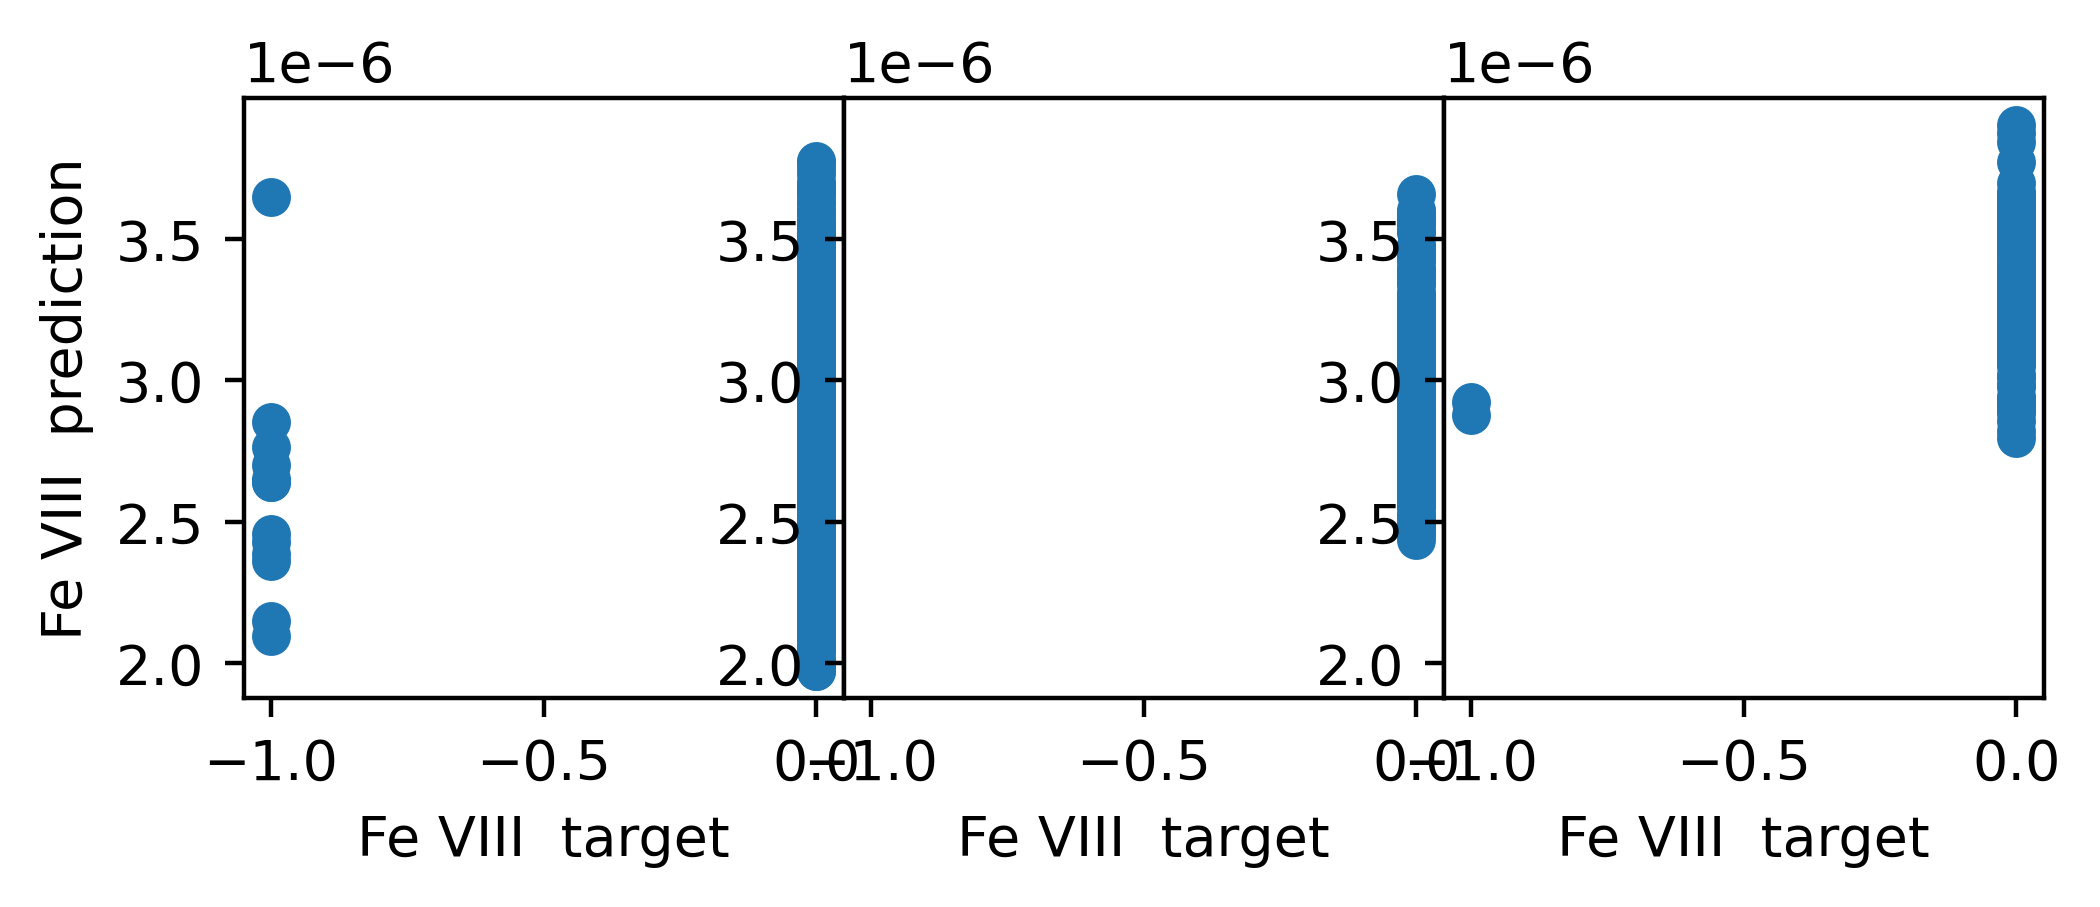

In [6]:
line = 1

name = eve['metadata']['name'][line]

dpi = 400
pxx = 600   # Horizontal size of each panel
pxy = pxx   # Vertical size of each panel

nph = 1     # Number of horizontal panels
npv = 1     # Number of vertical panels 

# Padding
padv  = 0  #Vertical padding in pixels
padv2 = 0  #Vertical padding in pixels between panels
padh  = 0 #Horizontal padding in pixels at the edge of the figure
padh2 = 50  #Horizontal padding in pixels between panels

# Figure sizes in pixels
fszv = (npv*pxy + 2*padv + (npv-1)*padv2 )      #Vertical size of figure in pixels
fszh = (nph*pxx + 2*padh + (nph-1)*padh2 )      #Horizontal size of figure in pixels

# Conversion to relative units
ppxx   = pxx/fszh      # Horizontal size of each panel in relative units
ppxy   = pxy/fszv      # Vertical size of each panel in relative units
ppadv  = padv/fszv     #Vertical padding in relative units
ppadv2 = padv2/fszv    #Vertical padding in relative units
ppadh  = padh/fszh     #Horizontal padding the edge of the figure in relative units
ppadh2 = padh2/fszh    #Horizontal padding between panels in relative units

## Start Figure
fig = plt.figure(figsize=(fszh/dpi,fszv/dpi), dpi = dpi)

ax1 = fig.add_axes([ppadh, ppadv, ppxx, ppxy])
ax1.scatter(np.array(train_output['data'])[:,line], np.array(train_output['prediction'])[:,line])
ax1.set_xlabel(name + ' target')
ax1.set_ylabel(name + ' prediction')

ax2 = fig.add_axes([ppadh+ppxx, ppadv, ppxx, ppxy], sharex=ax1, sharey=ax1)
ax2.scatter(np.array(val_output['data'])[:, line], np.array(val_output['prediction'])[:, line])
ax2.set_xlabel(name + ' target')
# ax2.set_ylabel(name + ' prediction')

ax3 = fig.add_axes([ppadh+2*ppxx, ppadv, ppxx, ppxy], sharex=ax1, sharey=ax1)
ax3.scatter(np.array(test_output['data'])[:, line], np.array(test_output['prediction'])[:, line])
ax3.set_xlabel(name + ' target')
# ax1.set_ylabel(name + ' prediction')

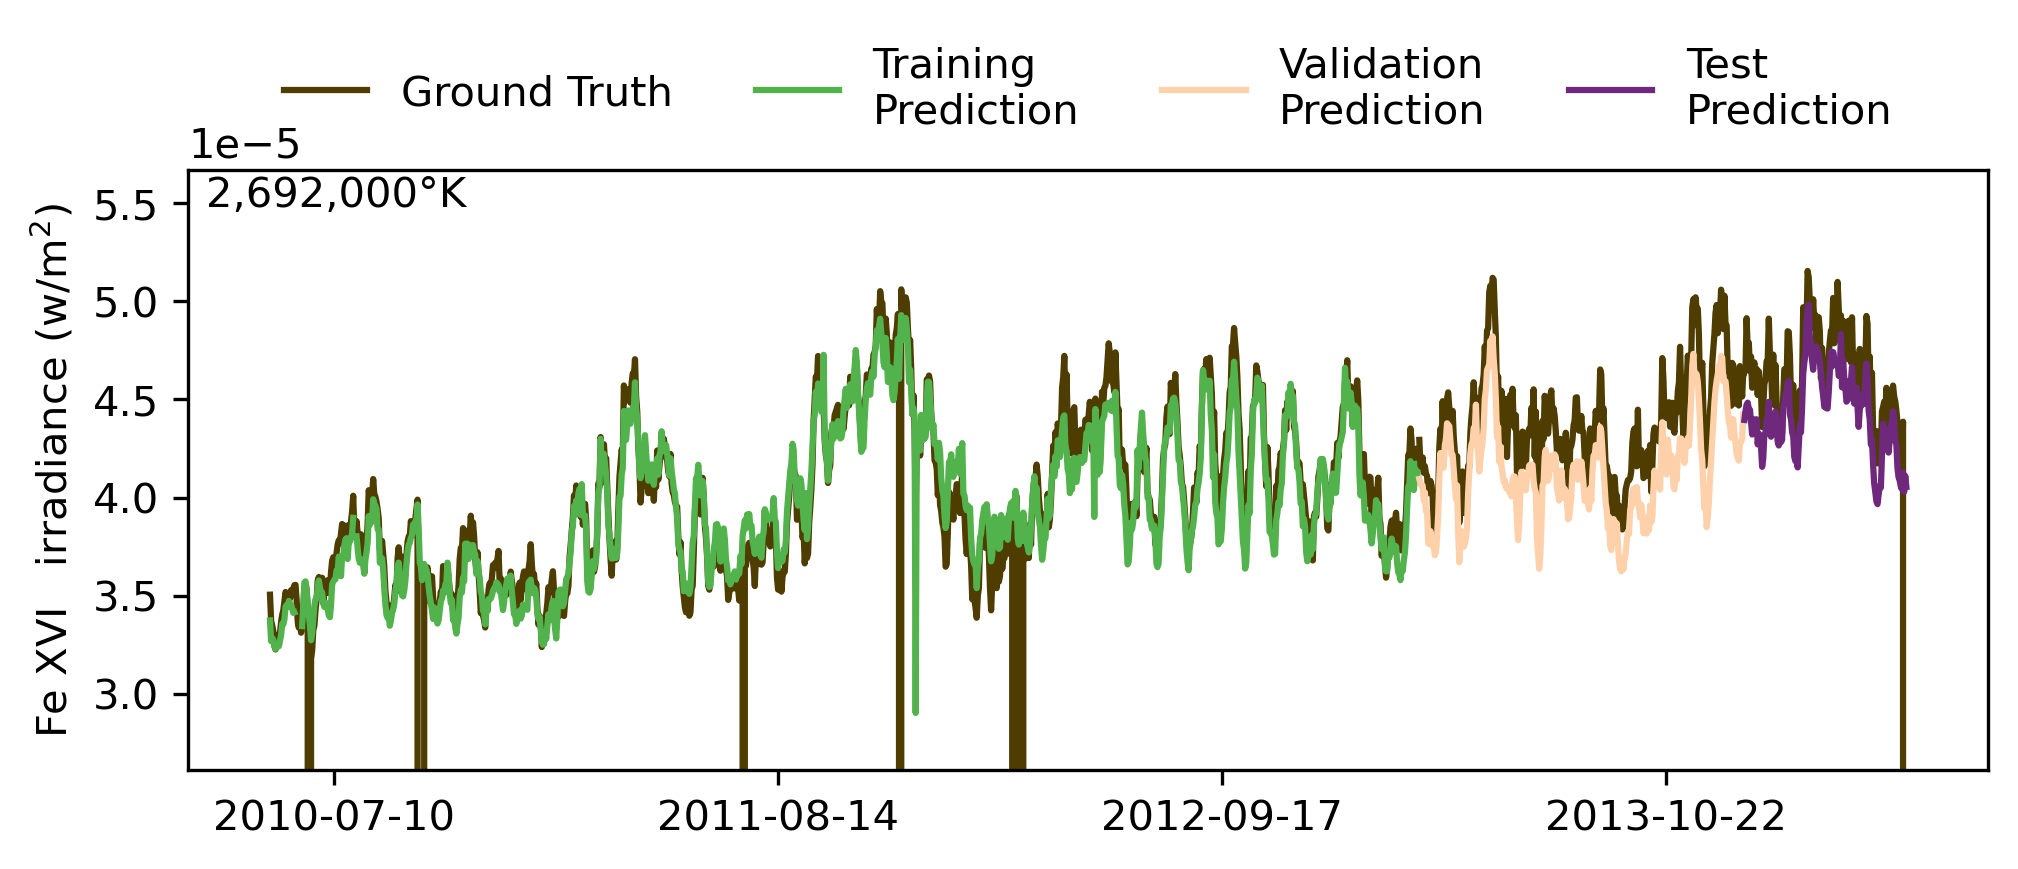

In [21]:

dpi = 300
pxx = 1800   # Horizontal size of each panel
pxy = 600   # Vertical size of each panel

nph = 1     # Number of horizontal panels
npv = 1     # Number of vertical panels 

# Padding
padv  = 0  #Vertical padding in pixels
padv2 = 0  #Vertical padding in pixels between panels
padh  = 0 #Horizontal padding in pixels at the edge of the figure
padh2 = 50  #Horizontal padding in pixels between panels

# Figure sizes in pixels
fszv = (npv*pxy + 2*padv + (npv-1)*padv2 )      #Vertical size of figure in pixels
fszh = (nph*pxx + 2*padh + (nph-1)*padh2 )      #Horizontal size of figure in pixels

# Conversion to relative units
ppxx   = pxx/fszh      # Horizontal size of each panel in relative units
ppxy   = pxy/fszv      # Vertical size of each panel in relative units
ppadv  = padv/fszv     #Vertical padding in relative units
ppadv2 = padv2/fszv    #Vertical padding in relative units
ppadh  = padh/fszh     #Horizontal padding the edge of the figure in relative units
ppadh2 = padh2/fszh    #Horizontal padding between panels in relative units

## Start Figure
fig = plt.figure(figsize=(fszh/dpi,fszv/dpi), dpi = dpi)
fig.autofmt_xdate()

ax1 = fig.add_axes([ppadh, ppadv, ppxx, ppxy])


for line in np.arange(0,14):

    name = eve['metadata']['name'][line]
    temperature = "{:,}".format(int(np.round(10**eve['metadata']['logt'][line]/1000)*1000)) + '°K'

    Imax = np.nanmax(np.array(train_output['data'])[:,line])
    Imax = np.nanmax([Imax, np.nanmax(np.array(val_output['data'])[:,line])])
    Imax = np.nanmax([Imax, np.nanmax(np.array(test_output['data'])[:,line])])

    Imin = np.nanmin(np.array(train_output['prediction'])[:,line])
    Imin = np.nanmin([Imin, np.nanmin(np.array(val_output['prediction'])[:,line])])
    Imin = np.nanmin([Imin, np.nanmin(np.array(test_output['prediction'])[:,line])])

    ax1.clear()

    ax1.plot(train_dates, np.array(train_output['data'])[:,line], color = Clr[1], label='Ground Truth')
    ax1.plot(train_dates, np.array(train_output['prediction'])[:,line], color = Clr[3], label='Training\nPrediction')
    # ax1.set_xlabel(name + ' target')
    ax1.set_ylabel(name + ' irradiance (w/m$^2$)')


    ax1.plot(val_dates, np.array(val_output['data'])[:, line], color = Clr[1])
    ax1.plot(val_dates, np.array(val_output['prediction'])[:,line], color = Clr[5], label='Validation\nPrediction')

    ax1.plot(test_dates, np.array(test_output['data'])[:,line], color = Clr[1])
    ax1.plot(test_dates, np.array(test_output['prediction'])[:,line], color = Clr[2], label='Test\nPrediction')

    myFmt = DateFormatter("%Y-%m-%d")
    ax1.xaxis.set_major_formatter(myFmt)
    # ax1.tick_params(axis='x', labelrotation=90)
    ax1.xaxis.set_major_locator(plt.MaxNLocator(5))

    ax1.legend(loc='lower center', ncol=4, bbox_to_anchor=(0.5, 1), frameon=False)

    factor = 0.1
    ax1.set_ylim([Imin*(1-factor), Imax*(1+factor)])

    ax1.text(0.01, 0.99, temperature, horizontalalignment='left', verticalalignment='top', transform=ax1.transAxes)

    fig.savefig(f'/home/andres_munoz_j/plots/EVE_linear_model_Jul_15_{name}.png'.replace(' ','_'), bbox_inches='tight', dpi = dpi, pad_inches=0)


In [19]:
for line in np.arange(0,14):
    print("{:,}".format(int(np.round(10**eve['metadata']['logt'][line]/1000)*1000)))

6,457,000
372,000
9,333,000
646,000
977,000
1,175,000
1,349,000
1,549,000
1,862,000
56,000
1,995,000
50,000
2,692,000
2,692,000
